In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs
import seaborn as sns
import glob
from typing import Any, Callable, Optional, Tuple, Union
from pint.definitions import UnitDefinition
import pint.converters
import pint.unit
import pint
from packaging import version
import xesmf as xe

import numpy as np
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import gamma, norm
from scipy.signal import detrend
import xarray as xr


In [2]:
#!pip install statsmodels

In [3]:
!which python

/root/miniconda3/envs/xesmf_env/bin/python


In [4]:
xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

lats,late, lons,lone = [4,14,2,16]
#ds_obs = xr.open_mfdataset('D:/Observed_Climatedata/AirTemp/air*.nc').air.sel(time=slice('1979', '2014')).sel(lat=slice(late,lats)).sel(lon=slice(lons,lone)).mean(dim='lat').mean(dim='lon')
ds_obs = xr.open_mfdataset('/mnt/d/Observed_Climatedata/Precipitation/precip*.nc').precip.sel(time=slice('1979', '2014')).sel(lat=slice(late,lats)).sel(lon=slice(lons,lone)).mean(dim='lat').mean(dim='lon')
y = ds_obs.groupby("time.month").mean("time")

# Computing distributions of correlation between seasonal cycle of precipitation

#corr_ = []
df_corr = pd.DataFrame()

cnt = 0
base_dir = '/mnt/d/CMIP6_data_extraction_hist/'
vars_ = ['pr']#,'pr', 'tas', 'tasmax', 'tasmin', 'uas', 'vas', 'hurs']
exps = ['historical']#, 'ssp126', 'ssp585']

for i_var,var in enumerate(vars_):
    for i_exp,exp in enumerate(exps):
        df_data_availability = pd.read_csv(base_dir+var+'_'+exp+'_data_available_unique_models.csv')
        data_base_dir = '/mnt/d/CMIP6_data_extraction_hist/'
        # add model loop here
        for i_model in range(df_data_availability.shape[0]):
            for i_ens in range(1):
                file_ = data_base_dir+var+'_'+exp+'_'+df_data_availability.iloc[i_model,0]+'_ens_'+str(i_ens+1)+'.nc'
                #print('Reading ')
            print(file_)
            try:
                ds_hist = xr.open_dataset(file_)[var+'_'].sel(time=slice('1979', '2014')). \
                sel(lat=slice(lats,late)).sel(lon=slice(lons,lone)).mean(dim='lat').mean(dim='lon')*86400
                x = ds_hist.groupby("time.month").mean("time")
                #y = ds_obs.groupby("time.month").mean("time")
                #corr_.append(np.corrcoef(x,y)[0,1])
                #print(x,y)

                print(np.corrcoef(x,y)[0,1])
                df_corr = df_corr.append(pd.DataFrame({'model':df_data_availability.iloc[i_model,0], \
                               'experiment':exp, 'ensemble':i_ens+1, 'corr':np.corrcoef(x,y)[0,1]}, index=[cnt]))
                print(df_corr)
                cnt = cnt + 1
                #print('Successfully read ', file_)
            except:
                continue

df_corr.to_csv('pr.csv')              

/mnt/d/CMIP6_data_extraction_hist/pr_historical_EC-Earth-Consortium_ens_1.nc
0.991884806179612
                 model  experiment  ensemble      corr
0  EC-Earth-Consortium  historical         1  0.991885
/mnt/d/CMIP6_data_extraction_hist/pr_historical_MIROC_ens_1.nc
0.9819538618214154
                 model  experiment  ensemble      corr
0  EC-Earth-Consortium  historical         1  0.991885
1                MIROC  historical         1  0.981954
/mnt/d/CMIP6_data_extraction_hist/pr_historical_CCCma_ens_1.nc
0.9514585930928066
                 model  experiment  ensemble      corr
0  EC-Earth-Consortium  historical         1  0.991885
1                MIROC  historical         1  0.981954
2                CCCma  historical         1  0.951459
/mnt/d/CMIP6_data_extraction_hist/pr_historical_CNRM-CERFACS_ens_1.nc
0.9639472778924861
                 model  experiment  ensemble      corr
0  EC-Earth-Consortium  historical         1  0.991885
1                MIROC  historical         1  0

0.9820553021158555
                  model  experiment  ensemble      corr
0   EC-Earth-Consortium  historical         1  0.991885
1                 MIROC  historical         1  0.981954
2                 CCCma  historical         1  0.951459
3          CNRM-CERFACS  historical         1  0.963947
4                 CSIRO  historical         1  0.972026
5                   NCC  historical         1  0.978054
6                  IPSL  historical         1  0.995376
7                  MOHC  historical         1  0.977746
8                 MPI-M  historical         1  0.994259
9                  NCAR  historical         1  0.976775
10                  INM  historical         1  0.994114
11                  MRI  historical         1  0.901858
12                  CAS  historical         1  0.790723
13                  BCC  historical         1  0.975067
14                 CMCC  historical         1  0.983843
15         CSIRO-ARCCSS  historical         1  0.982055
/mnt/d/CMIP6_data_extraction_

0.9918325110367228
                  model  experiment  ensemble      corr
0   EC-Earth-Consortium  historical         1  0.991885
1                 MIROC  historical         1  0.981954
2                 CCCma  historical         1  0.951459
3          CNRM-CERFACS  historical         1  0.963947
4                 CSIRO  historical         1  0.972026
5                   NCC  historical         1  0.978054
6                  IPSL  historical         1  0.995376
7                  MOHC  historical         1  0.977746
8                 MPI-M  historical         1  0.994259
9                  NCAR  historical         1  0.976775
10                  INM  historical         1  0.994114
11                  MRI  historical         1  0.901858
12                  CAS  historical         1  0.790723
13                  BCC  historical         1  0.975067
14                 CMCC  historical         1  0.983843
15         CSIRO-ARCCSS  historical         1  0.982055
16            NOAA-GFDL  hist

In [5]:
df_corr_tas = pd.read_csv('tas.csv')

In [6]:
df_corr_tas[df_corr_tas['corr']>0.8]

,Unnamed: 0,model,experiment,ensemble,corr
1,1,MIROC,historical,1,0.967822
3,3,CNRM-CERFACS,historical,1,0.985947
8,8,MPI-M,historical,1,0.810287
10,10,INM,historical,1,0.804853
13,13,AWI,historical,1,0.954570
14,14,BCC,historical,1,0.832696
16,16,CMCC,historical,1,0.827532
17,17,NIMS-KMA,historical,1,0.831156
18,18,NOAA-GFDL,historical,1,0.815695
22,22,CCCR-IITM,historical,1,0.868073


In [7]:
def quantile_correction(obs_data, mod_data, sce_data, modified=True):
    cdf = ECDF(mod_data)
    p = cdf(sce_data) * 100
    cor = np.subtract(*[np.nanpercentile(x, p) for x in [obs_data, mod_data]])
    if modified:
        mid = np.subtract(*[np.nanpercentile(x, 50) for x in [obs_data, mod_data]])
        g = np.true_divide(*[np.nanpercentile(x, 50) for x in [obs_data, mod_data]])

        iqr_obs_data = np.subtract(*np.nanpercentile(obs_data, [75, 25]))
        iqr_mod_data = np.subtract(*np.nanpercentile(mod_data, [75, 25]))

        f = np.true_divide(iqr_obs_data, iqr_mod_data)
        cor = g * mid + f * (cor - mid)
        return sce_data + cor
    else:
        return sce_data + cor
    
class XBiasCorrection(object):
    def __init__(self, obs_data, mod_data, sce_data, dim="time"):
        self.obs_data = obs_data
        self.mod_data = mod_data
        self.sce_data = sce_data
        self.dim = dim

    def correct(
        self,
        method="modified_quantile",
        lower_limit=0.1,
        cdf_threshold=0.9999999,
        vectorize=True,
        dask="parallelized",
        **apply_ufunc_kwargs
    ):
        dtype = self._set_dtype()
        dim = self.dim

        corrected = xr.apply_ufunc(
            quantile_correction,
            self.obs_data,
            self.mod_data,
            self.sce_data,
            vectorize=vectorize,
            dask=dask,
            input_core_dims=[['time'], ['time'], ['time']],
            output_core_dims=[['time']],
            kwargs={"modified": False},
            **apply_ufunc_kwargs
        )
        self.corrected = corrected
        return self.corrected

    def _set_dtype(self):
        aa = self.mod_data
        if isinstance(aa, xr.Dataset):
            dtype = aa[list(aa.data_vars)[0]].dtype
        elif isinstance(aa, xr.DataArray):
            dtype = aa.dtype
        return dtype

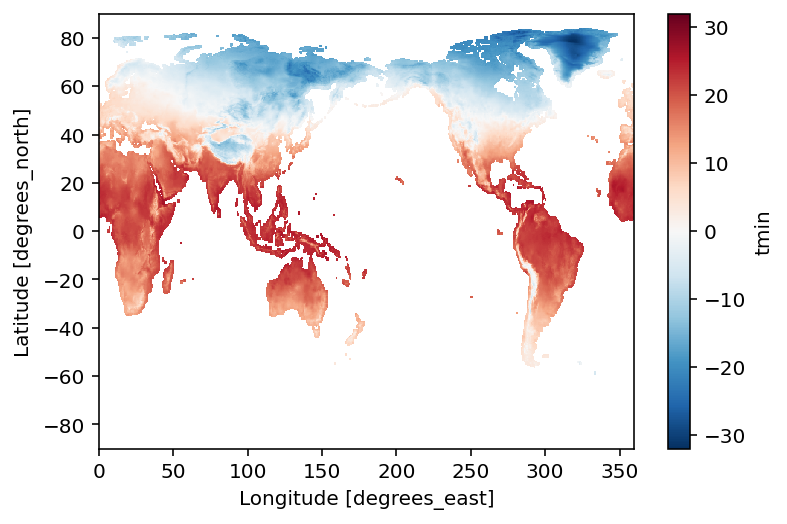

In [8]:
ds_obs = xr.open_mfdataset('/mnt/d/Observed_Climatedata/AirTemp_Min_Max/tmin*.nc').tmin
ds_obs.mean(dim='time').plot()

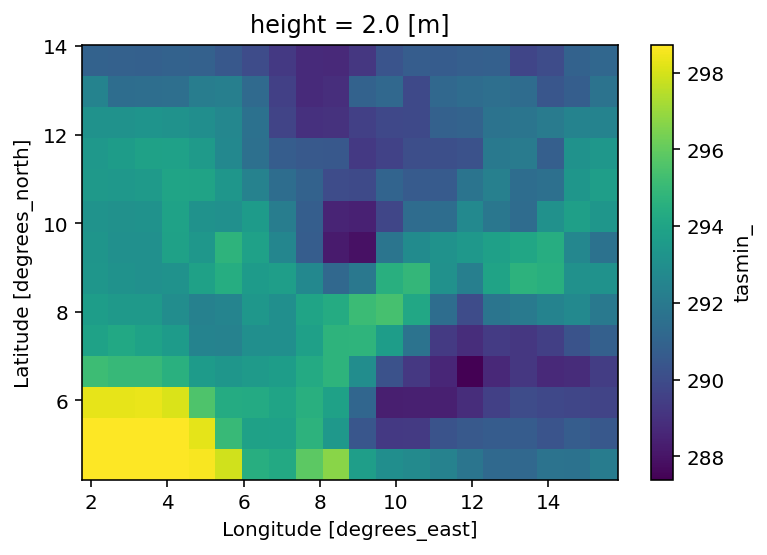

In [9]:
data_base_dir = '/mnt/d/CMIP6_data_extraction_hist/'
file_= data_base_dir+'tasmin_historical_EC-Earth-Consortium_ens_1.nc'
ds_model_hist = xr.open_dataset(file_).tasmin_
ds_model_hist.mean(dim='time').plot()


# Bias correction for Max. Temperature

In [13]:
lats,late, lons,lone = [4,14,2,16]
ds_obs = xr.open_mfdataset('/mnt/d/Observed_Climatedata/AirTemp_Min_Max/tmax*.nc').tmax.sel(time=slice('1979', '2014')).sel(lat=slice(late,lats)).sel(lon=slice(lons,lone))+273.15 #.mean(dim='lat').mean(dim='lon')
#ds_obs = xr.open_mfdataset('/mnt/d/Observed_Climatedata/Precipitation/precip*.nc').precip.sel(time=slice('1979', '2014')).sel(lat=slice(late,lats)).sel(lon=slice(lons,lone))#.mean(dim='lat').mean(dim='lon')

############################################################
vars_ = ['tasmax']
exps = ['historical']
cnt = 0
base_dir = '/mnt/d/CMIP6_data_extraction_hist/'
for i_var,var in enumerate(vars_):
    for i_exp,exp in enumerate(exps):
        df_data_availability = pd.read_csv(base_dir+var+'_'+exp+'_data_available_unique_models.csv')
        
        # add model loop here
        for i_model in range(1,df_data_availability.shape[0]):
            data_base_dir = '/mnt/d/CMIP6_data_extraction_hist/'
            for i_ens in range(1):
                file_ = data_base_dir+var+'_'+exp+'_'+df_data_availability.iloc[i_model,0]+'_ens_'+str(i_ens+1)+'.nc'
                #print('Reading ')
            print(file_)
            try:
                ds_model_hist = xr.open_dataset(file_)[var+'_']
#######################################################



# data_base_dir = '/mnt/d/CMIP6_data_extraction_hist/'
# file_ = data_base_dir+'pr_historical_MIROC_ens_1.nc'
# ds_model_hist = xr.open_dataset(file_)
#ds_model_hist.sel(time=slice('1979','2014'))

                ds_historical = ds_model_hist.copy()
                datetimeindex = ds_historical.indexes['time']#.to_datetimeindex()
                ds_historical['time'] = datetimeindex

                common_dates = np.intersect1d(np.asarray(ds_historical.time.values.astype('datetime64[D]').tolist()), \
                              np.asarray(ds_obs.time.values.astype('datetime64[D]').tolist()))
                ds_historical['time'] = ('time', ds_historical.time.values.astype('datetime64[D]'))
                ds_historical_ = ds_historical.sel(time=common_dates)
                ds_obs_ = ds_obs.sel(time=common_dates)

                data_base_dir = '/mnt/d/CMIP6_data_extraction_ssp126/'
                file_ = data_base_dir+'tasmax_ssp126_'+df_data_availability.iloc[i_model,0]+'_ens_1.nc'
                ds_ssp126 = xr.open_dataset(file_)

                data_base_dir = '/mnt/d/CMIP6_data_extraction_ssp585/'
                file_ = data_base_dir+'tasmax_ssp585_'+df_data_availability.iloc[i_model,0]+'_ens_1.nc'
                ds_ssp585 = xr.open_dataset(file_)

                ds_out = xr.Dataset({'lat': (['lat'], ds_historical_.lat.values),
                                     'lon': (['lon'], ds_historical_.lon.values),
                                    }
                                   )
                regridder = xe.Regridder(ds_obs_, ds_out, 'bilinear')
                #regridder.clean_weight_file()
                ds_obs_o = regridder(ds_obs_)
                                
                
                # Multiply model data with 86400 to convert to mm/day
                bias_corrected = np.zeros_like(ds_ssp126.tasmax_.values)
                for i_ in range(bias_corrected.shape[1]):
                    for j_ in range(bias_corrected.shape[2]):
                        bias_corrected[:,i_,j_] =  quantile_correction(ds_obs_o.values[:,i_,j_], \
                                                                     ds_historical_.tasmax_.values[:,i_,j_]*86400, \
                                                                     ds_ssp126.tasmax_.values[:,i_,j_]*86400, modified=True)
                ds_ssp126['tasmax_bc'] = (('time', 'lat', 'lon'), bias_corrected)
                ds_ssp126.to_netcdf('tasmax_ssp126_'+df_data_availability.iloc[i_model,0]+'_ens_bias_corrected.nc')
                

                # Multiply model data with 86400 to convert to mm/day
                bias_corrected = np.zeros_like(ds_ssp585.tasmax_.values)
                for i_ in range(bias_corrected.shape[1]):
                    for j_ in range(bias_corrected.shape[2]):
                        bias_corrected[:,i_,j_] =  quantile_correction(ds_obs_o.values[:,i_,j_], \
                                                                     ds_historical_.tasmax_.values[:,i_,j_]*86400, \
                                                                     ds_ssp585.tasmax_.values[:,i_,j_]*86400, modified=True)
                ds_ssp585['tasmax_bc'] = (('time', 'lat', 'lon'), bias_corrected)
                ds_ssp585.to_netcdf('tasmax_ssp585_'+df_data_availability.iloc[i_model,0]+'_ens_bias_corrected.nc')
                
            except:
                continue

/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_MIROC_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_CCCma_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_CNRM-CERFACS_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_NCC_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_IPSL_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_CSIRO_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_MPI-M_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_INM_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_MRI_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_BCC_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_AWI_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_NOAA-GFDL_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_CAS_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_NUIST_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_HAMMOZ-Consortium_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_CSIRO-ARCCSS_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_NIMS-KMA_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_NASA-GISS_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_SNU_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_KIOST_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_AS-RCEC_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_CAMS_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmax_historical_CMCC_ens_1.nc


In [15]:
ds_obs

<xarray.DataArray 'tmax' (time: 13149, lat: 20, lon: 28)>
dask.array<getitem, shape=(13149, 20, 28), dtype=float32, chunksize=(366, 20, 28), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 13.75 13.25 12.75 12.25 11.75 ... 5.75 5.25 4.75 4.25
  * lon      (lon) float32 2.25 2.75 3.25 3.75 4.25 ... 14.25 14.75 15.25 15.75
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2014-12-31
Attributes:
    level_desc:    Surface
    parent_stat:   Other
    long_name:     Daily Maximum Temperature
    cell_methods:  time: mean
    valid_range:   [-90.  50.]
    avg_period:    0000-00-01 00:00:00
    dataset:       CPC Global Temperature
    comments:      GTS data and is gridded using the Shepard Algorithm
    max_period:    6z to 6z
    actual_range:  [-59.656933  22.819536]
    units:         degC
    var_desc:      Maximum Temperature
    statistic:     Maximum

# Bias correction for Min. Temperature

In [10]:
lats,late, lons,lone = [4,14,2,16]
ds_obs = xr.open_mfdataset('/mnt/d/Observed_Climatedata/AirTemp_Min_Max/tmin*.nc').tmin.sel(time=slice('1979', '2014')).sel(lat=slice(late,lats)).sel(lon=slice(lons,lone))+273.15 #.mean(dim='lat').mean(dim='lon')
#ds_obs = xr.open_mfdataset('/mnt/d/Observed_Climatedata/Precipitation/precip*.nc').precip.sel(time=slice('1979', '2014')).sel(lat=slice(late,lats)).sel(lon=slice(lons,lone))#.mean(dim='lat').mean(dim='lon')

############################################################
vars_ = ['tasmin']
exps = ['historical']
cnt = 0
base_dir = '/mnt/d/CMIP6_data_extraction_hist/'
for i_var,var in enumerate(vars_):
    for i_exp,exp in enumerate(exps):
        df_data_availability = pd.read_csv(base_dir+var+'_'+exp+'_data_available_unique_models.csv')
        
        # add model loop here
        for i_model in range(1,df_data_availability.shape[0]):
            data_base_dir = '/mnt/d/CMIP6_data_extraction_hist/'
            for i_ens in range(1):
                file_ = data_base_dir+var+'_'+exp+'_'+df_data_availability.iloc[i_model,0]+'_ens_'+str(i_ens+1)+'.nc'
                #print('Reading ')
            print(file_)
            try:
                ds_model_hist = xr.open_dataset(file_)[var+'_']
    #######################################################



    # data_base_dir = '/mnt/d/CMIP6_data_extraction_hist/'
    # file_ = data_base_dir+'pr_historical_MIROC_ens_1.nc'
    # ds_model_hist = xr.open_dataset(file_)
    #ds_model_hist.sel(time=slice('1979','2014'))

                ds_historical = ds_model_hist.copy()
                datetimeindex = ds_historical.indexes['time']#.to_datetimeindex()
                ds_historical['time'] = datetimeindex

                common_dates = np.intersect1d(np.asarray(ds_historical.time.values.astype('datetime64[D]').tolist()), \
                              np.asarray(ds_obs.time.values.astype('datetime64[D]').tolist()))
                ds_historical['time'] = ('time', ds_historical.time.values.astype('datetime64[D]'))
                ds_historical_ = ds_historical.sel(time=common_dates)
                ds_obs_ = ds_obs.sel(time=common_dates)

                data_base_dir = '/mnt/d/CMIP6_data_extraction_ssp126/'
                file_ = data_base_dir+'tasmin_ssp126_'+df_data_availability.iloc[i_model,0]+'_ens_1.nc'
                ds_ssp126 = xr.open_dataset(file_)

                data_base_dir = '/mnt/d/CMIP6_data_extraction_ssp585/'
                file_ = data_base_dir+'tasmin_ssp585_'+df_data_availability.iloc[i_model,0]+'_ens_1.nc'
                ds_ssp585 = xr.open_dataset(file_)

                ds_out = xr.Dataset({'lat': (['lat'], ds_historical_.lat.values),
                                     'lon': (['lon'], ds_historical_.lon.values),
                                    }
                                   )
                regridder = xe.Regridder(ds_obs_, ds_out, 'bilinear')
                #regridder.clean_weight_file()
                ds_obs_o = regridder(ds_obs_)
                regridder = xe.Regridder(ds_ssp126, ds_out, 'bilinear')
                ds_ssp126_ = regridder(ds_ssp126.tasmin_)
                regridder = xe.Regridder(ds_ssp585, ds_out, 'bilinear')
                ds_ssp585_ = regridder(ds_ssp585.tasmin_)


                # Multiply model data with 86400 to convert to mm/day
                bias_corrected = np.zeros_like(ds_ssp126_.values)
                for i_ in range(bias_corrected.shape[1]):
                    for j_ in range(bias_corrected.shape[2]):
                        bias_corrected[:,i_,j_] =  quantile_correction(ds_obs_o.values[:,i_,j_], \
                                                                     ds_historical_.values[:,i_,j_]*86400, \
                                                                     ds_ssp126_.values[:,i_,j_]*86400, modified=True)
                ds_ssp126_['tasmin_bc'] = (('time', 'lat', 'lon'), bias_corrected)
                ds_ssp126_.to_netcdf('tasmin_ssp126_'+df_data_availability.iloc[i_model,0]+'_ens_bias_corrected.nc')


                # Multiply model data with 86400 to convert to mm/day
                bias_corrected = np.zeros_like(ds_ssp585_.values)
                for i_ in range(bias_corrected.shape[1]):
                    for j_ in range(bias_corrected.shape[2]):
                        bias_corrected[:,i_,j_] =  quantile_correction(ds_obs_o.values[:,i_,j_], \
                                                                     ds_historical_.values[:,i_,j_]*86400, \
                                                                     ds_ssp585_.values[:,i_,j_]*86400, modified=True)
                ds_ssp585_['tasmin_bc'] = (('time', 'lat', 'lon'), bias_corrected)
                ds_ssp585_.to_netcdf('tasmin_ssp585_'+df_data_availability.iloc[i_model,0]+'_ens_bias_corrected.nc')

            except:
                continue

/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_MIROC_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_CCCma_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_CNRM-CERFACS_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_NCC_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_IPSL_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_CSIRO_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_MOHC_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_MPI-M_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_INM_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_MRI_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_BCC_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_AWI_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_CAS_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_NOAA-GFDL_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_NUIST_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_HAMMOZ-Consortium_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_CSIRO-ARCCSS_ens_1.nc


/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/core.py:450: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/root/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_NIMS-KMA_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_NASA-GISS_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_SNU_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_KIOST_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_AS-RCEC_ens_1.nc
/mnt/d/CMIP6_data_extraction_hist/tasmin_historical_CMCC_ens_1.nc
